In [1]:
!pip install chart_studio

In [2]:

!pip install cufflinks

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from chart_studio.plotly import plot,iplot
import cufflinks as cf
import seaborn as sns



%matplotlib inline

In [5]:
df=pd.read_excel("Data_Train.xlsx")

In [6]:
import pandas_profiling as pf

In [7]:
pf.ProfileReport(df)

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [10]:
df.shape


(10683, 11)

In [11]:
df.dtypes #checking the data types


Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [12]:
df.isna().sum() #Checking null values


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [13]:
df.dropna(how='any',inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Feature Engineering
Let's convert Date_of_Journey to its appropriate format as datetime with regards to day and month

In [14]:
df.head(3)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [15]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df['Day_of_Journey']=(df['Date_of_Journey']).dt.day
df['Month_of_Journey']=(df['Date_of_Journey']).dt.month

In [16]:
df.head(3)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9


In [17]:
df.drop(["Date_of_Journey"],axis=1,inplace=True)

In [18]:

#covert to datetime
df['Dep_hr']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute

In [19]:
#we can now drop the 'Dep_Time'

df.drop(["Dep_Time"],axis=1,inplace=True)

Arrival_time

In [20]:
df['Arrival_hr']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min']=pd.to_datetime(df['Arrival_Time']).dt.minute

In [21]:
#we can now drop the 'Arrival_Time'

df.drop(["Arrival_Time"],axis=1,inplace=True)

Duration Time¶


In [22]:
duration=df['Duration'].str.split(' ',expand=True) #split duration datapoints based on space ' '
duration[1].fillna('00m',inplace=True)   #fill all "NAN" with '00m'
df['duration_hr']=duration[0].apply(lambda x: x[:-1]) #select the item at index o and leave the last one (in this case the 'h')
df['duration_min']=duration[1].apply(lambda x: x[:-1]) #select the item at index 1 and leave the last one (in this case the 'm')

In [23]:
#we can now drop the 'Duration'

df.drop(["Duration"],axis=1,inplace=True)

In [24]:
df.head(3)


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,00


In [25]:
cf.set_config_file(theme='ggplot',sharing='public',offline=True)


Count of Airlines¶


In [26]:
df['Airline'].value_counts()


Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

C:\Users\ryan\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Jet Airways Business'),
  Text(1, 0, 'Jet Airways'),
  Text(2, 0, 'Multiple carriers Premium economy'),
  Text(3, 0, 'Multiple carriers'),
  Text(4, 0, 'Air India'),
  Text(5, 0, 'Vistara Premium economy'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'GoAir'),
  Text(8, 0, 'IndiGo'),
  Text(9, 0, 'Air Asia'),
  Text(10, 0, 'SpiceJet'),
  Text(11, 0, 'Trujet')])

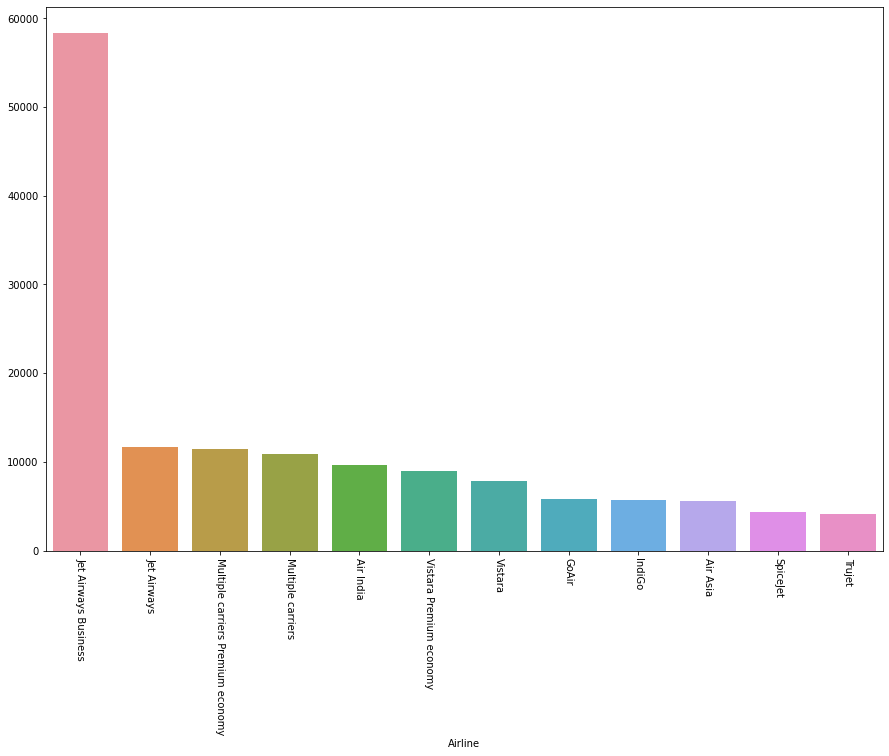

In [27]:
Airprices=df.groupby('Airline')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(Airprices.index,Airprices.values)
plt.xticks(rotation=270)

<function matplotlib.pyplot.show(close=None, block=None)>

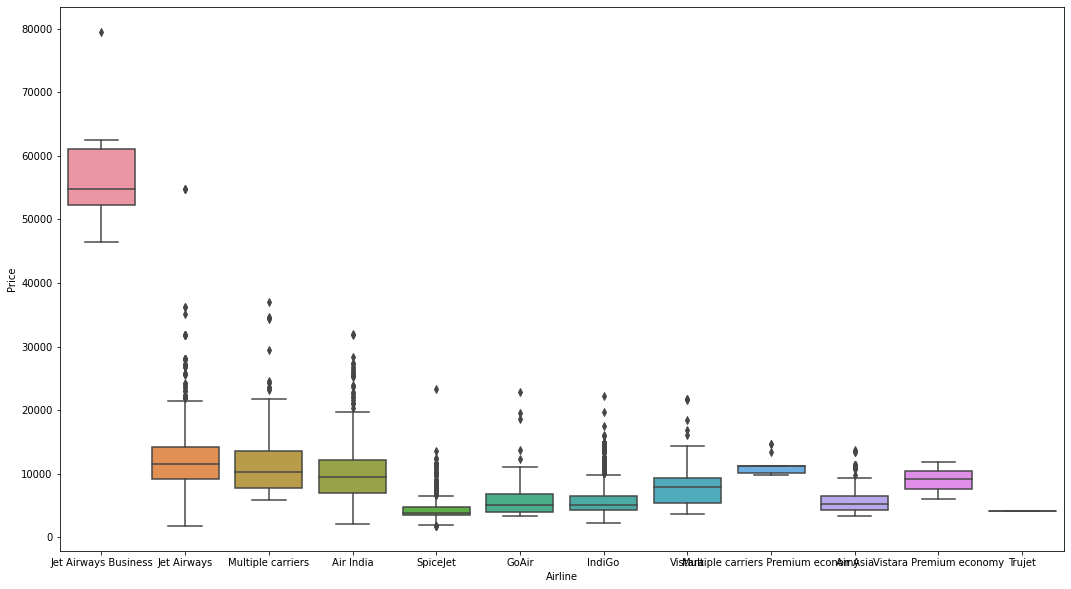

In [28]:

plt.figure(figsize=(18,10))
sns.boxplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False))
plt.show



Price based on number of stops¶

In [29]:
df.groupby(['Airline','Total_Stops'])['Price'].mean()


Airline                            Total_Stops
Air Asia                           1 stop          7078.325581
                                   2 stops         6341.888889
                                   non-stop        4492.331492
Air India                          1 stop          9041.509259
                                   2 stops        12092.779101
                                   3 stops        12208.054054
                                   4 stops        17686.000000
                                   non-stop        5605.326139
GoAir                              1 stop          6884.676471
                                   non-stop        4726.173913
IndiGo                             1 stop          7104.717528
                                   2 stops         7507.526316
                                   non-stop        4731.174053
Jet Airways                        1 stop         12512.741223
                                   2 stops        13387.247467
        

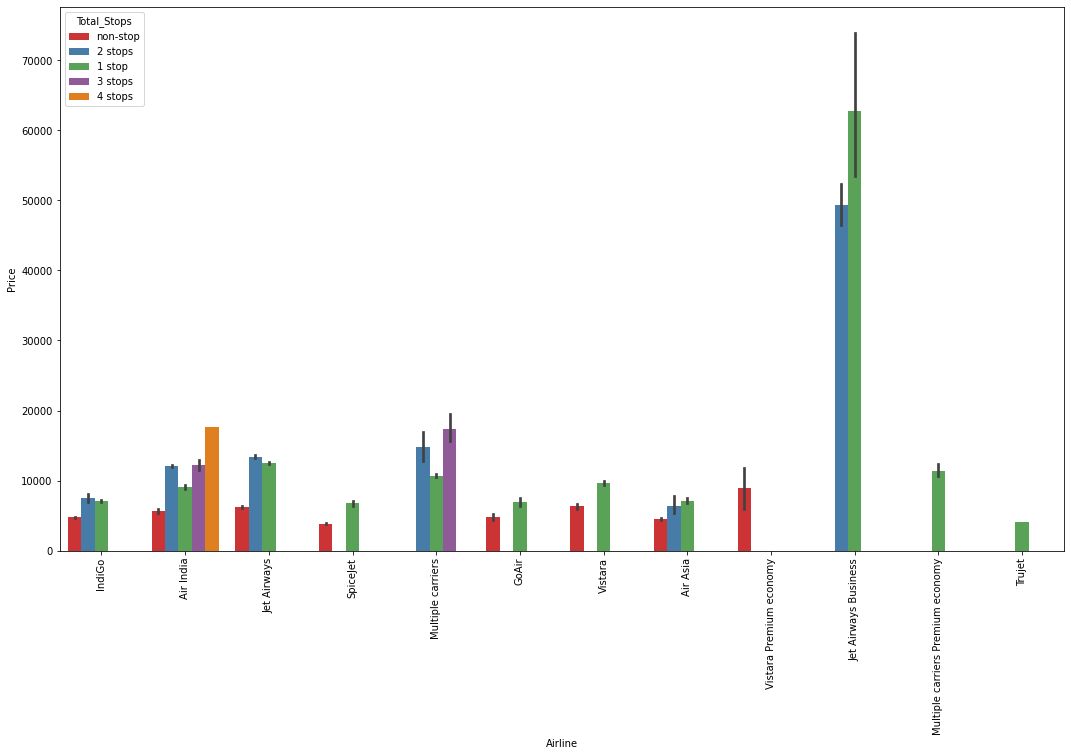

In [30]:
plt.figure(figsize=(18,10))
ax=sns.barplot(x=df['Airline'],y=df['Price'],hue=df['Total_Stops'],palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [31]:
df['Source'].value_counts()


Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

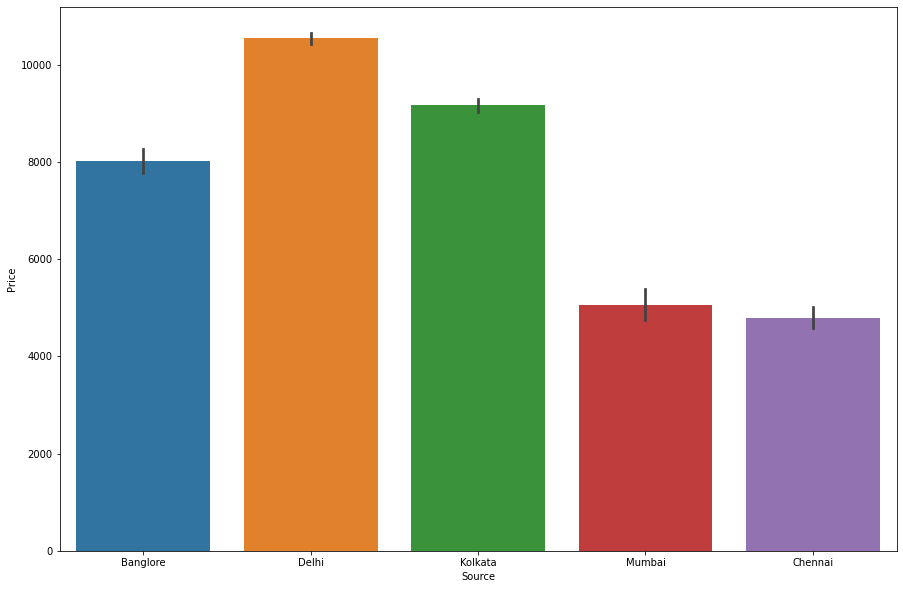

In [32]:

plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Source',data=df.sort_values('Price',ascending=False))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

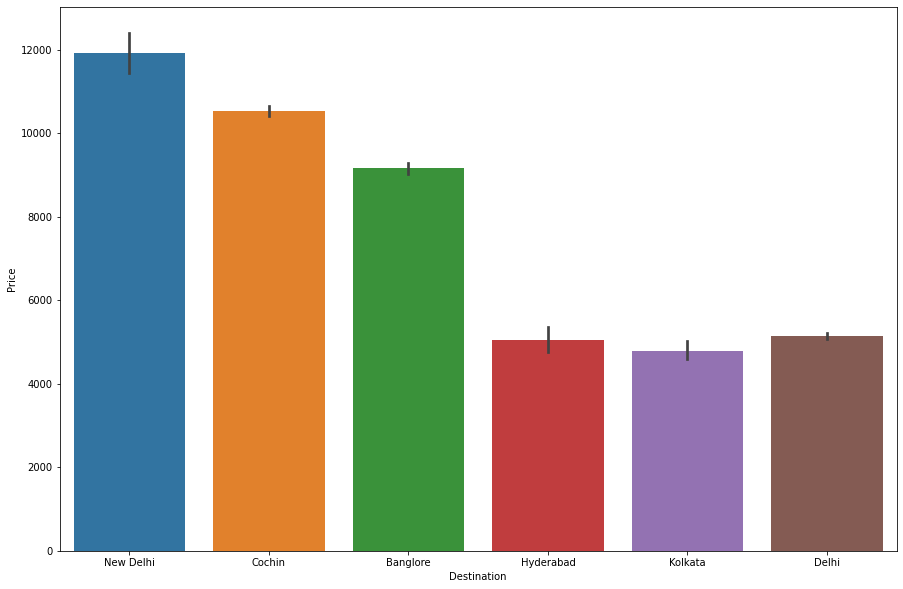

In [33]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.show

In [34]:
df['Destination'].value_counts()


Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [35]:
for i in df:
    df.replace('New Delhi','Delhi',inplace=True)

In [36]:
df['Destination'].unique()


array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

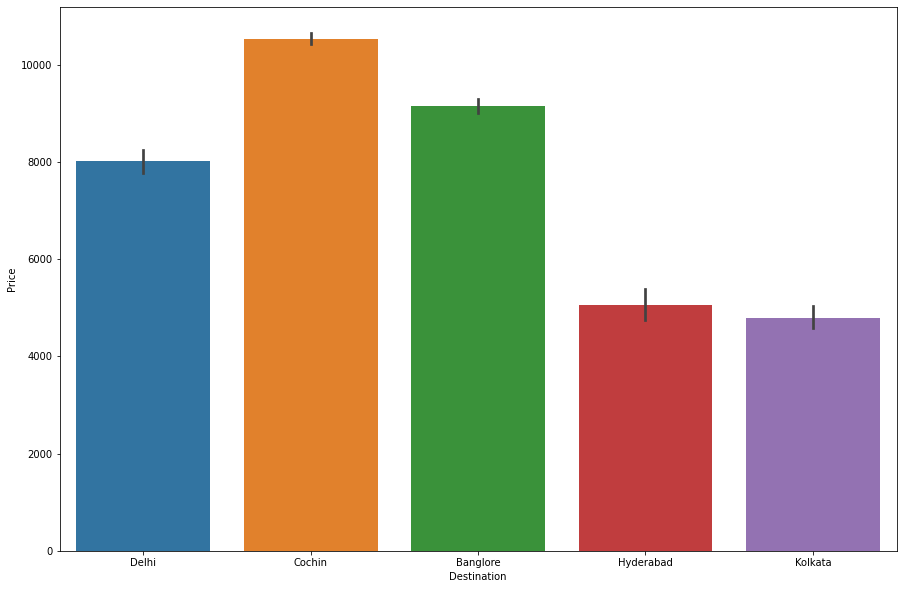

In [37]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.show

In [38]:
df.corr()

,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min
Price,1.000000,-0.165448,0.010705,0.006799,-0.024458,0.024244,-0.086155
Day_of_Journey,-0.165448,1.000000,-0.264896,-0.002301,-0.016433,-0.002176,-0.021423
Month_of_Journey,0.010705,-0.264896,1.000000,0.028189,0.002136,-0.004329,-0.025786
Dep_hr,0.006799,-0.002301,0.028189,1.000000,-0.024745,0.005180,0.067911
Dep_min,-0.024458,-0.016433,0.002136,-0.024745,1.000000,0.043122,-0.017597
Arrival_hr,0.024244,-0.002176,-0.004329,0.005180,0.043122,1.000000,-0.154363
Arrival_min,-0.086155,-0.021423,-0.025786,0.067911,-0.017597,-0.154363,1.000000


<Figure size 3600x3600 with 0 Axes>

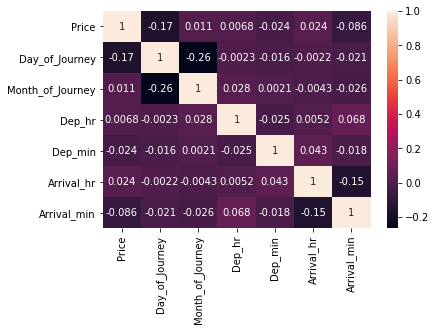

<Figure size 3600x3600 with 0 Axes>

In [147]:
sns.heatmap(df.corr(),annot = True)
plt.figure(figsize = (50,50))


In [39]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64




Apply Onehot Encoding on the categorical variables

In [40]:
#Handling Categorical Values 
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})
air_dummy=pd.get_dummies(df['Airline'],drop_first=True)
# print(df['Source'].value_counts())
# print(df['Destination'].value_counts())

source_dest_dummy=pd.get_dummies(df[['Source','Destination']],drop_first=True)
df=pd.concat([air_dummy,source_dest_dummy,df],axis=1)

In [41]:
df.drop(['Airline','Source','Destination'],inplace=True,axis=1)

In [42]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,3,1,16,50,21,35,4,45


In [43]:
df.shape


(10682, 31)

In [44]:
df_test=pd.read_excel("Test_set.xlsx")


In [45]:
df_test.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [46]:
df_test['Date_of_Journey']=pd.to_datetime(df_test['Date_of_Journey'])
df_test['Day_of_Journey']=(df_test['Date_of_Journey']).dt.day
df_test['Month_of_Journey']=(df_test['Date_of_Journey']).dt.month

#Dep_time 
df_test['Dep_hr']=pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_min']=pd.to_datetime(df_test['Dep_Time']).dt.minute

#Arrival_time
df_test['Arrival_hr']=pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_min']=pd.to_datetime(df_test['Arrival_Time']).dt.minute

#Splitting duration  time

a=df_test['Duration'].str.split(' ',expand=True)
a[1].fillna('00m',inplace=True)
df_test['dur_hr']=a[0].apply(lambda x: x[:-1])
df_test['dur_min']=a[1].apply(lambda x: x[:-1])

#dropping the data
df_test.drop(['Date_of_Journey','Duration','Arrival_Time','Dep_Time'],inplace=True,axis=1)

#Handling Categorical Values 
df_test['Total_Stops']=df_test['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

air_dummy=pd.get_dummies(df_test['Airline'],drop_first=True)
source_dest_dummy=pd.get_dummies(df_test[['Source','Destination']],drop_first=True)
df_test=pd.concat([air_dummy,source_dest_dummy,df_test],axis=1)

In [47]:
df_test.drop(['Airline','Source','Destination','Additional_Info',"Route"],inplace=True,axis=1)

In [48]:
print('train_shape',df.shape)
print('test_shape',df_test.shape)

train_shape (10682, 31)
test_shape (2671, 28)


In [49]:

df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,3,1,16,50,21,35,4,45


In [50]:
x=df.drop(['Route', 'Price','Additional_Info'],axis=1)
y=df['Price']




Model Building and Hyperparameter Tuning


ExtraTreesRegressor

In [51]:
from sklearn.ensemble import ExtraTreesRegressor
ET_Model=ExtraTreesRegressor()
ET_Model.fit(x,y)

C:\Users\ryan\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\ryan\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\ryan\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:284: 

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

<AxesSubplot:>

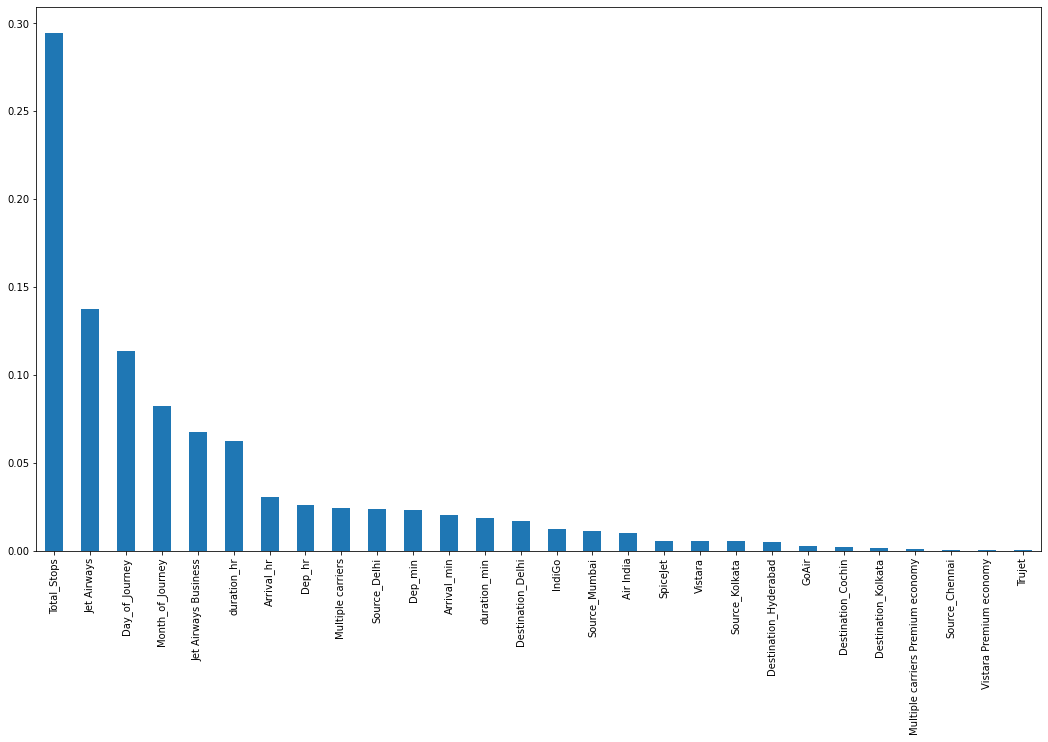

In [52]:
pd.Series(ET_Model.feature_importances_,index=x.columns).sort_values(ascending=False).plot(kind='bar',figsize=(18,10))

In [53]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)

In [54]:

#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(X_train,y_train)
y_predict=ET_Model.predict(X_test)


from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

C:\Users\ryan\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



0.7681641633122294

In [55]:
from sklearn.ensemble import RandomForestRegressor
RF_Model=RandomForestRegressor()
RF_Model.fit(X_train,y_train)
y_predict=RF_Model.predict(X_test)
r2_score(y_test,y_predict)

C:\Users\ryan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\Users\ryan\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



0.7975456162286041

Hyperparameter



In [56]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 80, stop = 1500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(6, 45, num = 5)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

# create random grid

rand_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf=RandomForestRegressor()

rCV=RandomizedSearchCV(estimator=rf,param_distributions=rand_grid,scoring='neg_mean_squared_error',n_iter=10,cv=3,random_state=42, n_jobs = 1)

In [57]:
rCV.fit(X_train,y_train)

C:\Users\ryan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:269: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\ryan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link 

C:\Users\ryan\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\ryan\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional info

C:\Users\ryan\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\ryan\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional info

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [58]:
rf_pred=rCV.predict(X_test)
rf_pred

C:\Users\ryan\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



array([12484.36773358,  4283.02779002,  6131.16194784, ...,
       11616.72109041,  9730.48874685,  8668.15646339])

In [59]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE',mean_absolute_error(y_test,rf_pred))
print('MSE',mean_squared_error(y_test,rf_pred))


MAE 1156.4276399843882
MSE 3960682.12860682


In [60]:
r2_score(y_test,rf_pred)


0.807112850208592

In [61]:
from catboost import CatBoostRegressor

Cat_Model=CatBoostRegressor()
Cat_Model.fit(X_train,y_train)

Learning rate set to 0.05718
0:	learn: 4466.5316537	total: 160ms	remaining: 2m 39s
1:	learn: 4319.1952920	total: 169ms	remaining: 1m 24s
2:	learn: 4170.0874200	total: 181ms	remaining: 1m
3:	learn: 4033.1061207	total: 193ms	remaining: 48.2s
4:	learn: 3909.5332929	total: 204ms	remaining: 40.5s
5:	learn: 3788.8771850	total: 214ms	remaining: 35.4s
6:	learn: 3677.5795256	total: 225ms	remaining: 31.9s
7:	learn: 3585.9715553	total: 236ms	remaining: 29.3s
8:	learn: 3499.6424958	total: 248ms	remaining: 27.3s
9:	learn: 3408.9602975	total: 259ms	remaining: 25.6s
10:	learn: 3329.4018172	total: 271ms	remaining: 24.4s
11:	learn: 3258.4306577	total: 281ms	remaining: 23.1s
12:	learn: 3188.9732731	total: 290ms	remaining: 22s
13:	learn: 3126.6519374	total: 300ms	remaining: 21.1s
14:	learn: 3064.8092738	total: 313ms	remaining: 20.5s
15:	learn: 3011.9738031	total: 323ms	remaining: 19.9s
16:	learn: 2960.0953295	total: 335ms	remaining: 19.4s
17:	learn: 2917.5532184	total: 347ms	remaining: 18.9s
18:	learn: 2

159:	learn: 1952.7697326	total: 2.53s	remaining: 13.3s
160:	learn: 1951.1012882	total: 2.54s	remaining: 13.3s
161:	learn: 1948.6492071	total: 2.55s	remaining: 13.2s
162:	learn: 1945.1133182	total: 2.57s	remaining: 13.2s
163:	learn: 1942.7228013	total: 2.58s	remaining: 13.2s
164:	learn: 1940.9073624	total: 2.6s	remaining: 13.2s
165:	learn: 1938.0460170	total: 2.62s	remaining: 13.2s
166:	learn: 1935.3286398	total: 2.63s	remaining: 13.1s
167:	learn: 1932.9545795	total: 2.65s	remaining: 13.1s
168:	learn: 1931.6124443	total: 2.67s	remaining: 13.1s
169:	learn: 1929.5307514	total: 2.68s	remaining: 13.1s
170:	learn: 1927.4963218	total: 2.7s	remaining: 13.1s
171:	learn: 1925.4669384	total: 2.71s	remaining: 13s
172:	learn: 1924.3200339	total: 2.72s	remaining: 13s
173:	learn: 1922.7154464	total: 2.73s	remaining: 13s
174:	learn: 1920.9589969	total: 2.74s	remaining: 12.9s
175:	learn: 1919.1457003	total: 2.76s	remaining: 12.9s
176:	learn: 1918.1069516	total: 2.77s	remaining: 12.9s
177:	learn: 1916.2

318:	learn: 1745.5901590	total: 4.75s	remaining: 10.1s
319:	learn: 1745.5765557	total: 4.75s	remaining: 10.1s
320:	learn: 1744.1031020	total: 4.76s	remaining: 10.1s
321:	learn: 1742.8866256	total: 4.77s	remaining: 10s
322:	learn: 1741.8273962	total: 4.78s	remaining: 10s
323:	learn: 1740.8624193	total: 4.78s	remaining: 9.98s
324:	learn: 1739.2263355	total: 4.79s	remaining: 9.95s
325:	learn: 1738.2951082	total: 4.8s	remaining: 9.92s
326:	learn: 1737.8994124	total: 4.81s	remaining: 9.89s
327:	learn: 1737.2891842	total: 4.81s	remaining: 9.86s
328:	learn: 1736.2589351	total: 4.82s	remaining: 9.83s
329:	learn: 1735.4256185	total: 4.83s	remaining: 9.8s
330:	learn: 1735.2946332	total: 4.83s	remaining: 9.77s
331:	learn: 1734.5323241	total: 4.84s	remaining: 9.73s
332:	learn: 1732.6404977	total: 4.84s	remaining: 9.7s
333:	learn: 1732.5282950	total: 4.85s	remaining: 9.68s
334:	learn: 1731.4241971	total: 4.86s	remaining: 9.65s
335:	learn: 1729.9668045	total: 4.87s	remaining: 9.62s
336:	learn: 1729.

468:	learn: 1625.4496746	total: 5.57s	remaining: 6.31s
469:	learn: 1624.7112217	total: 5.58s	remaining: 6.29s
470:	learn: 1624.2622200	total: 5.58s	remaining: 6.27s
471:	learn: 1624.2544618	total: 5.58s	remaining: 6.25s
472:	learn: 1623.7022772	total: 5.59s	remaining: 6.23s
473:	learn: 1622.9758180	total: 5.59s	remaining: 6.21s
474:	learn: 1622.4563447	total: 5.6s	remaining: 6.19s
475:	learn: 1621.7731100	total: 5.6s	remaining: 6.17s
476:	learn: 1621.1142457	total: 5.61s	remaining: 6.15s
477:	learn: 1619.8373853	total: 5.61s	remaining: 6.13s
478:	learn: 1619.0926589	total: 5.62s	remaining: 6.11s
479:	learn: 1619.0830420	total: 5.62s	remaining: 6.09s
480:	learn: 1619.0772375	total: 5.62s	remaining: 6.07s
481:	learn: 1618.4094727	total: 5.63s	remaining: 6.05s
482:	learn: 1617.6254499	total: 5.63s	remaining: 6.03s
483:	learn: 1616.7895567	total: 5.64s	remaining: 6.01s
484:	learn: 1615.6639556	total: 5.64s	remaining: 5.99s
485:	learn: 1615.0438262	total: 5.65s	remaining: 5.97s
486:	learn: 

618:	learn: 1536.8173234	total: 6.22s	remaining: 3.83s
619:	learn: 1536.1052756	total: 6.23s	remaining: 3.82s
620:	learn: 1535.1996869	total: 6.24s	remaining: 3.81s
621:	learn: 1534.7568360	total: 6.24s	remaining: 3.79s
622:	learn: 1533.6734381	total: 6.25s	remaining: 3.78s
623:	learn: 1533.2817782	total: 6.25s	remaining: 3.77s
624:	learn: 1531.9847430	total: 6.26s	remaining: 3.75s
625:	learn: 1531.6709164	total: 6.26s	remaining: 3.74s
626:	learn: 1531.4089851	total: 6.27s	remaining: 3.73s
627:	learn: 1531.0177469	total: 6.28s	remaining: 3.72s
628:	learn: 1530.6774057	total: 6.29s	remaining: 3.71s
629:	learn: 1530.0732918	total: 6.3s	remaining: 3.7s
630:	learn: 1529.6138379	total: 6.3s	remaining: 3.69s
631:	learn: 1529.1466712	total: 6.31s	remaining: 3.67s
632:	learn: 1528.6969230	total: 6.32s	remaining: 3.66s
633:	learn: 1528.4074316	total: 6.33s	remaining: 3.65s
634:	learn: 1527.8535961	total: 6.33s	remaining: 3.64s
635:	learn: 1526.8717055	total: 6.34s	remaining: 3.63s
636:	learn: 1

782:	learn: 1463.2603730	total: 7.05s	remaining: 1.95s
783:	learn: 1462.8708785	total: 7.06s	remaining: 1.94s
784:	learn: 1462.6241174	total: 7.06s	remaining: 1.93s
785:	learn: 1461.8440981	total: 7.07s	remaining: 1.92s
786:	learn: 1461.5016436	total: 7.07s	remaining: 1.91s
787:	learn: 1461.3249833	total: 7.08s	remaining: 1.9s
788:	learn: 1461.3197895	total: 7.08s	remaining: 1.89s
789:	learn: 1461.3177745	total: 7.08s	remaining: 1.88s
790:	learn: 1461.0518284	total: 7.09s	remaining: 1.87s
791:	learn: 1460.5921315	total: 7.09s	remaining: 1.86s
792:	learn: 1460.2121733	total: 7.1s	remaining: 1.85s
793:	learn: 1459.9359226	total: 7.1s	remaining: 1.84s
794:	learn: 1459.3348157	total: 7.1s	remaining: 1.83s
795:	learn: 1458.8742722	total: 7.11s	remaining: 1.82s
796:	learn: 1458.3295069	total: 7.11s	remaining: 1.81s
797:	learn: 1457.9688362	total: 7.12s	remaining: 1.8s
798:	learn: 1457.9648254	total: 7.12s	remaining: 1.79s
799:	learn: 1457.5744072	total: 7.12s	remaining: 1.78s
800:	learn: 145

943:	learn: 1411.2194518	total: 7.71s	remaining: 458ms
944:	learn: 1410.7058195	total: 7.72s	remaining: 449ms
945:	learn: 1410.2869816	total: 7.72s	remaining: 441ms
946:	learn: 1410.1688619	total: 7.73s	remaining: 433ms
947:	learn: 1409.9576388	total: 7.73s	remaining: 424ms
948:	learn: 1409.7019315	total: 7.74s	remaining: 416ms
949:	learn: 1409.5539003	total: 7.74s	remaining: 408ms
950:	learn: 1409.4242917	total: 7.75s	remaining: 399ms
951:	learn: 1409.1164346	total: 7.75s	remaining: 391ms
952:	learn: 1408.9998123	total: 7.76s	remaining: 383ms
953:	learn: 1408.9456486	total: 7.76s	remaining: 374ms
954:	learn: 1408.3353653	total: 7.77s	remaining: 366ms
955:	learn: 1407.9314986	total: 7.77s	remaining: 358ms
956:	learn: 1407.6987672	total: 7.78s	remaining: 349ms
957:	learn: 1407.4323027	total: 7.78s	remaining: 341ms
958:	learn: 1406.9693403	total: 7.79s	remaining: 333ms
959:	learn: 1406.6843112	total: 7.79s	remaining: 325ms
960:	learn: 1406.4428982	total: 7.79s	remaining: 316ms
961:	learn

In [62]:
cat_pred=Cat_Model.predict(X_test)


In [63]:
r2_score(y_test,cat_pred)


0.8301928561140887

In [64]:
X_train[['duration_hr','duration_min']]=X_train[['duration_hr','duration_min']].astype(int)
X_test[['duration_hr','duration_min']]=X_test[['duration_hr','duration_min']].astype(int)

In [65]:
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor()
lgb_model.fit(X_train,y_train)

C:\Users\ryan\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [66]:
lgb_pred=lgb_model.predict(X_test)
r2_score(y_test,lgb_pred)

0.8030064936005559

In [67]:
import xgboost as xgb
xgb_model=xgb.XGBRegressor()
xgb_model.fit(X_train,y_train)
xgb_pred=xgb_model.predict(X_test)
r2_score(y_test,xgb_pred)

0.8212496825906317

In [68]:
df.head()


,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,3,1,16,50,21,35,4,45


In [69]:
df.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Route', 'Total_Stops', 'Additional_Info', 'Price', 'Day_of_Journey',
       'Month_of_Journey', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min',
       'duration_hr', 'duration_min'],
      dtype='object')

In [70]:
deploy_df=df.drop(['Route','Additional_Info'],axis=1)

In [71]:
deploy_df.to_csv('deploy_df.csv')

In [72]:
deploy_df

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,0,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,2,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,2,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,1,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,1,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,...,0,4107,4,9,19,55,22,25,2,30
10679,1,0,0,0,0,0,0,0,0,0,...,0,4145,27,4,20,45,23,20,2,35
10680,0,0,0,1,0,0,0,0,0,0,...,0,7229,27,4,8,20,11,20,3,00
10681,0,0,0,0,0,0,0,0,0,1,...,0,12648,3,1,11,30,14,10,2,40


In [75]:
# #Use pickle to save our model so that we can use it later
import pickle 
 # Saving model to disk
pickle.dump(Cat_Model, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))